In [36]:
import numpy as np
from scipy.sparse.linalg import svds
import csv

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [37]:
L = []
D = []

In [38]:
with open("Lc.txt") as tsv:
    for line in csv.reader(tsv, dialect="excel-tab"): #You can also use delimiter="\t" rather than giving a dialect.
        L.append(line)
        
with open("D.txt") as tsv:
    for line in csv.reader(tsv, dialect="excel-tab"): #You can also use delimiter="\t" rather than giving a dialect.
        D.append(line)

In [39]:
L = np.matrix(L, dtype=float)
L = np.matrix(L, dtype=complex)
D = np.array(D, dtype=float) [0]

In [40]:
def L_t(L,D,t):
    Lt = np.zeros_like(L)
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            Lt[i,j] = L[i,j] * np.exp(-1j*( D[i] - D[j] ) * t )
    return Lt

In [41]:
def contour_plot(Mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(abs(Mat), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

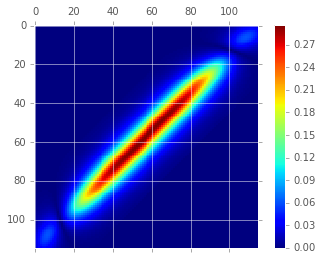

In [42]:
contour_plot(L)

In [43]:
u,s,vt = svds(L,k = 100)

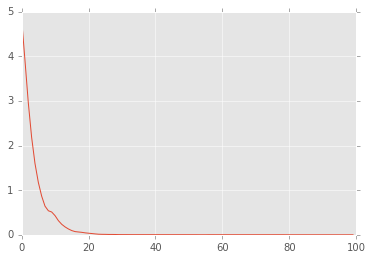

In [44]:
plt.plot(s)

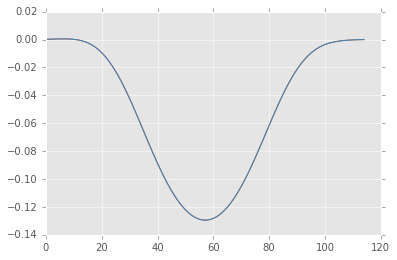

In [45]:
plt.plot(u[:,0])
plt.plot(vt[0,:])

In [100]:
def plot_eig_at_time(t = 0., eig_index = 0):
    u,s,vt = svds(L_t(L,D,t),k = eig_index+1)
    plt.plot(u[:,0].real)
    plt.plot(u[:,0].imag)
    plt.title("T = " + str(t))
    plt.show()

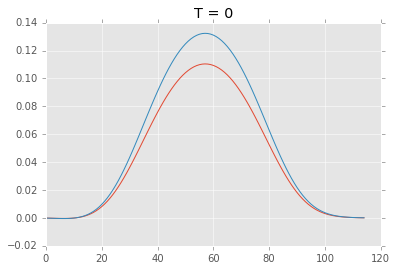

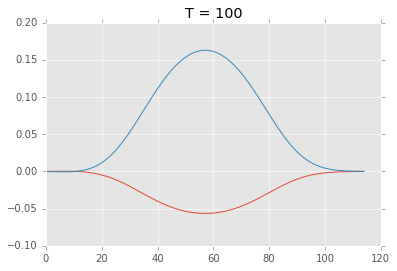

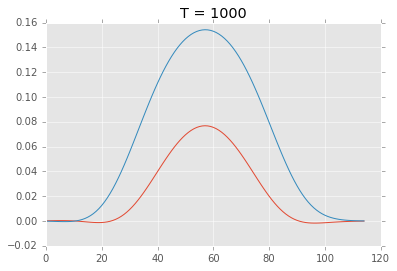

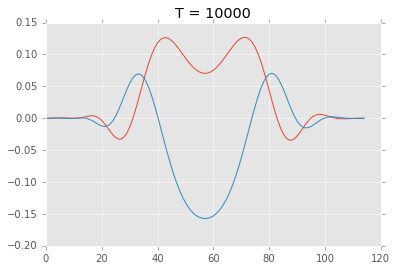

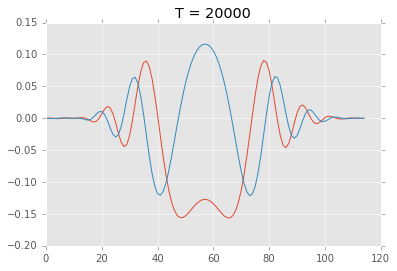

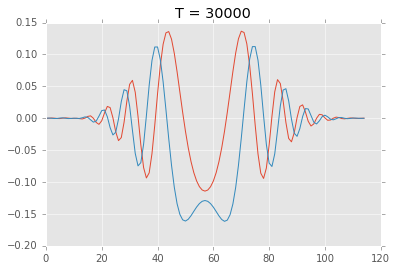

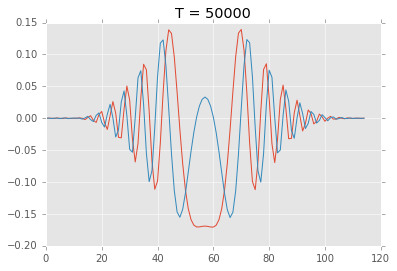

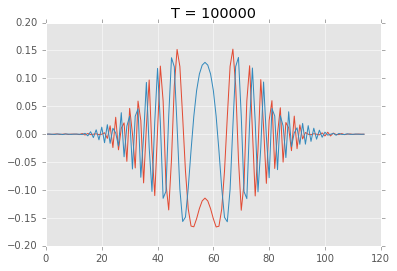

In [101]:
for t in [0,100,1000,10000,20000,30000,50000,100000]:
    plot_eig_at_time(t = t, eig_index = 0);